## Assignment 3
### CSCI 6612 - Visual Analytics
#### Submitted by: Aakash Patel (B00807065)

In [87]:
import pandas as pd
import numpy as np
import os

#### Loading the dataset

In [88]:
path = os.getcwd()
path = path+ '\\' + 'dataset1_processed.csv'
df = pd.read_csv(path)

In [89]:
# Delete Unnamed Column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [90]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.301370,State-gov,77516,Bachelors,0.203390,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,0.452055,Self-emp-not-inc,83311,Bachelors,0.203390,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,0.287671,Private,215646,HS-grad,0.135593,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,0.493151,Private,234721,11th,0.101695,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,0.150685,Private,338409,Bachelors,0.203390,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,0.273973,Private,284582,Masters,0.220339,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,0.438356,Private,160187,9th,0.067797,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,0.479452,Self-emp-not-inc,209642,HS-grad,0.135593,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,0.191781,Private,45781,Masters,0.220339,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
9,0.342466,Private,159449,Bachelors,0.203390,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


#### Preprocessing occupations
**NOTE**: Occupation categories were somehow unprocessed in the file submitted namely 'dataset1_processed.csv'. So, this section contains redundant code from assignment 1. 
It takes some time to run so I'll provide its exported file as 'dataset1_processed_updated.csv'

In [93]:
from difflib import SequenceMatcher
def similar(a,b):
    return SequenceMatcher(None,a,b).ratio()

occupations = ["Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty", "Handlers-cleaners",
"Machine-op-inspct", "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv",
"Armed-Forces"]
occulist = df['occupation'].unique()
occudict= dict.fromkeys(occulist , "")
keys = occudict.keys()
for k in keys:
    simibase = 0.0
    occubase = occudict[k]
    for occ in occupations: 
        simiindv = similar(k.lower(), occ.lower())
        if(simiindv > 0.8):
            simibase = simiindv
            occubase = occ
            break
        if(simibase < simiindv):
            simibase = simiindv
            occubase = occ
        
    occudict[k] = occubase
    
oclist = df['occupation'] 
for i in range(len(oclist)):
    str=oclist[i]
    if(str=="?" or str==""):
        oclist[i]="Other-service"
        continue
  
    oclist[i] = occudict[str]
    
df['occupation'] = oclist

c:\users\aakash patel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Reference: https://stackoverflow.com/questions/35517353/how-does-pythons-sequencematcher-work

In [94]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Transport-moving',
       'Farming-fishing', 'Machine-op-inspct', 'Sales', 'Tech-support',
       'Craft-repair', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [95]:
df.to_csv("dataset1_processed_updated.csv", encoding='utf-8', index=False)

#### Other Preprocessing 

In [96]:
from sklearn import preprocessing
def num_normalizer(attr):
    x = attr.values.astype(float)
    x= x.reshape(-1,1)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_normalized = pd.DataFrame(x_scaled)
    attr = df_normalized
    return attr

In [97]:
print(len(df[df['capital-loss']==0]))
print(len(df))

27946
29335


In [98]:
# Renaming columns to remove hyphens
df = df.rename(columns={'capital-loss': 'capital_loss', 'capital-gain': 'capital_gain', 'hours-per-week':'hrs_per_week' ,'education-num':'education_num' , 'marital-status':'marital_status', 'native-country':'native_country'})

#### Normalizing pending numeric attributes

In [99]:
# Normalize fnlwgt
df.fnlwgt = num_normalizer(df.fnlwgt)
# Normalize capital gain
df.capital_gain = num_normalizer(df.capital_gain)
# Normalize capital loss
df.capital_loss = num_normalizer(df.capital_loss)
# Normalize hours-per-week
df.hrs_per_week = num_normalizer(df.hrs_per_week)

In [100]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,salary
0,0.301370,State-gov,0.042616,Bachelors,0.203390,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.000000,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.046559,Bachelors,0.203390,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.000000,0.122449,United-States,<=50K
2,0.287671,Private,0.136593,HS-grad,0.135593,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.000000,0.397959,United-States,<=50K
3,0.493151,Private,0.149571,11th,0.101695,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.000000,0.397959,United-States,<=50K
4,0.150685,Private,0.220115,Bachelors,0.203390,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.000000,0.397959,Cuba,<=50K
5,0.273973,Private,0.183494,Masters,0.220339,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.000000,0.397959,United-States,<=50K
6,0.438356,Private,0.098861,9th,0.067797,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.000000,0.153061,Jamaica,<=50K
7,0.479452,Self-emp-not-inc,0.132508,HS-grad,0.135593,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.000000,0.448980,United-States,>50K
8,0.191781,Private,0.021025,Masters,0.220339,Never-married,Prof-specialty,Not-in-family,White,Female,0.0,0.000000,0.500000,United-States,>50K
9,0.342466,Private,0.098359,Bachelors,0.203390,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.000000,0.397959,United-States,>50K


In [101]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [102]:
# Made new df for encoding operations
df_encoded = df.drop_duplicates()

#### Encoding Attributes

In [103]:
def labelencoder(attr, colname):    
    lbl_encoder = LabelEncoder()
    int_encoded = lbl_encoder.fit_transform(attr)
    global df_encoded
    df_encoded[colname]=int_encoded

In [104]:
def onehotencoder(attr, colname):
    ex= pd.get_dummies(attr,prefix=colname, drop_first=True)
    global df_encoded
    df_encoded = pd.concat( [df_encoded,ex] , axis=1)
    df_encoded.drop([colname], axis=1, inplace=True)

In [105]:
# Encoding workclass
onehotencoder(df_encoded.workclass, 'workclass')

In [106]:
df_encoded.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', '7th-8th',
       'Doctorate', 'Assoc-acdm', 'Some-college', 'Assoc-voc',
       'Prof-school', '5th-6th', '10th', 'Preschool', '12th', '1st-4th'],
      dtype=object)

In [107]:
# Encoding education
onehotencoder(df_encoded.education,'education')

In [108]:
df_encoded.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [109]:
# Encoding marital-status
onehotencoder(df_encoded.marital_status,'marital_status')

In [110]:
df_encoded.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Transport-moving',
       'Farming-fishing', 'Machine-op-inspct', 'Sales', 'Tech-support',
       'Craft-repair', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [112]:
# Encoding Occupation
onehotencoder(df_encoded.occupation,'occupation')
# Encoding relationship
onehotencoder(df_encoded.relationship,'relationship')
# Encoding race
onehotencoder(df_encoded.race, 'race')
# Ecoding sex
onehotencoder(df_encoded.sex, 'sex')
# Encoding native_country
onehotencoder(df_encoded.native_country, 'native_country')
# Encoding salary
onehotencoder(df_encoded.salary,'salary')

In [114]:
df_encoded.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hrs_per_week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,salary_>50K
0,0.301370,0.042616,0.203390,0.0,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.452055,0.046559,0.203390,0.0,0.0,0.122449,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.136593,0.135593,0.0,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.493151,0.149571,0.101695,0.0,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.150685,0.220115,0.203390,0.0,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df_encoded.columns.values

array(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hrs_per_week', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital_status_Married-AF-spouse',
       'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent',
       'marital_status_Never-married', 'marital_status_Separated',
       'marital_status_Widowed', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers

In [116]:
# Removing Y attribute
df_train = df_encoded.drop(['salary_>50K'], axis=1)

#### Splitting Data into Training and Validation

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, df_encoded['salary_>50K'], test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20521, 96) (20521,)
(8795, 96) (8795,)


In [118]:
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier

def getClassifierObject():
    svm_clf = svm.SVC(kernel='linear')
    rfmodel = RandomForestClassifier()
    treemodel = tree.DecisionTreeClassifier()
    linmodel=LinearRegression()
    mlp = MLPClassifier()
    return svm_clf,rfmodel,treemodel,linmodel,mlp

In [119]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
# Global Lists for plotting Model comparison graph later 
model_names = []
model_acc = []
model_f1 = []

In [120]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
def plotgraph(scores,name):
    
    tf = pd.DataFrame({'Metric':['Testing accuracy', 'Training accuracy', 'Testing f1', 'Training f1'], 'Score':scores})
    ax = tf[['Metric','Score']].plot(kind='bar', title =name+" Classifier Performance Evaluation", figsize=(10,7), legend=True, color="coral", fontsize=13)
    ax.set_xlabel("Evaluation Metric", fontsize=13)
    ax.set_alpha(0.8)
    ax.set_yticks([0.0, 0.20, 0.40, 0.60, 0.80, 1.0])
    ax.set_xticklabels(['Testing accuracy', 'Training accuracy', 'Testing f1', 'Training f1'], rotation=0, fontsize=12)
    ax.legend()
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{0:.3f}'.format(height*100)+" %", (p.get_x()+.5*width, p.get_y() + height + 0.01), fontsize=13, ha = 'center')


##### References
https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
https://stackoverflow.com/questions/52080991/display-percentage-above-bar-chart-in-matplotlib/52082020
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

In [121]:
def evaluateModelsOnSplittedData(name, model):
    scores = []
    model = model.fit(X_train, y_train)
    print(name, ":")
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)
    print("Testing accuracy :",test_acc)
    scores.append(test_acc)
    score = metrics.accuracy_score(y_train, y_train_pred)
    print("Training accuracy :", score)
    scores.append(score)
    test_f1 = metrics.f1_score(y_test, y_test_pred, average='macro')
    print("Testing f1 :", test_f1)
    scores.append(test_f1)
    score = metrics.f1_score(y_train, y_train_pred, average='macro')
    print("Training f1 :",score)
    scores.append(score)
    plotgraph(scores,name)
 
    global model_names
    if name in model_names:
        return
    model_names.append(name)
    global model_acc
    model_acc.append(test_acc)
    global model_f1
    model_f1.append(test_f1)

### APPLYING ML ALOGIRITHMS

#### Decision Tree

Decision Tree :
Testing accuracy : 0.7765776009096077
Training accuracy : 0.9999025388626285
Testing f1 : 0.7039572187053771
Training f1 : 0.9998697763936109


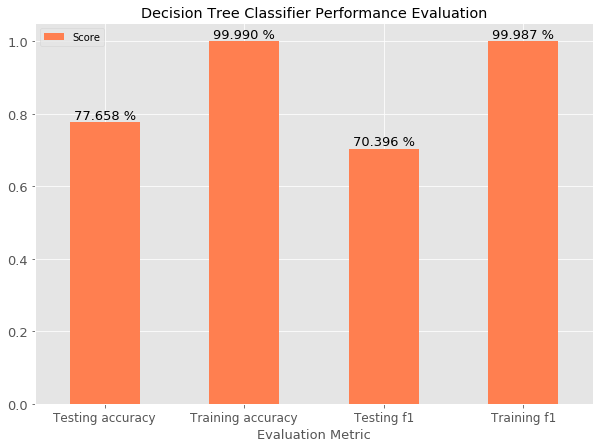

In [122]:
svm_clf,rfmodel,treemodel,linmodel,mlp=getClassifierObject()
evaluateModelsOnSplittedData('Decision Tree',treemodel)

#### Support Vector Machines

SVM :
Testing accuracy : 0.8254690164866402
Training accuracy : 0.8281272842454072
Testing f1 : 0.7371555947489314
Training f1 : 0.7433537967513235


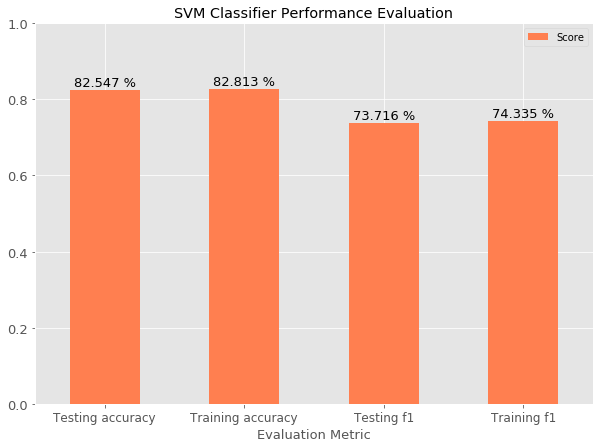

In [123]:
evaluateModelsOnSplittedData('SVM',svm_clf)

#### Random Forest

c:\users\aakash patel\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest :
Testing accuracy : 0.8236498010233086
Training accuracy : 0.985575751669022
Testing f1 : 0.7458540920383732
Training f1 : 0.9804719210098326


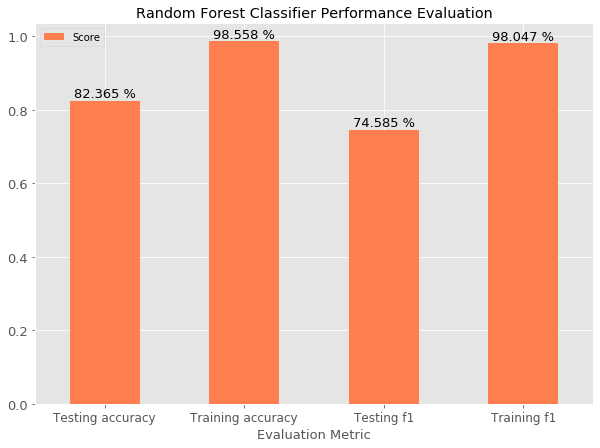

In [124]:
evaluateModelsOnSplittedData('Random Forest',rfmodel)

#### Neural Network

c:\users\aakash patel\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Network :
Testing accuracy : 0.827515633882888
Training accuracy : 0.8703766872959408
Testing f1 : 0.7524996771758714
Training f1 : 0.8162854430062443


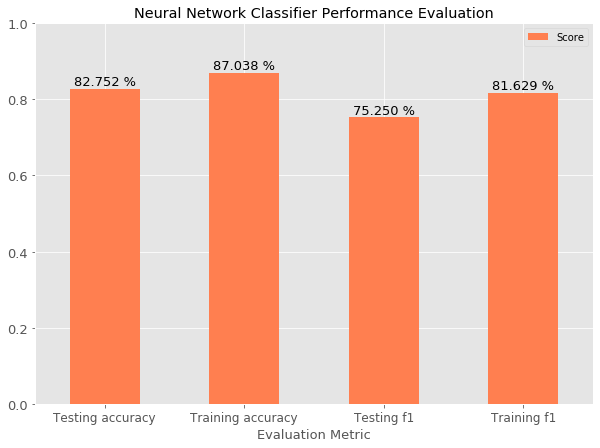

In [125]:
evaluateModelsOnSplittedData('Neural Network',mlp)

#### MODEL COMPARISON

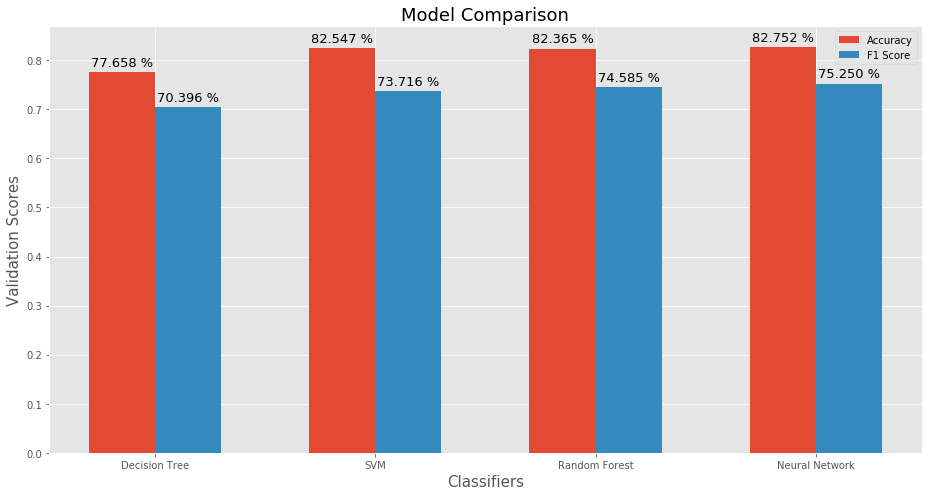

In [126]:
x = np.arange(len(model_names))  # the label locations
width = 0.30  # the width of the bars
fig, ax = plt.subplots(figsize=(13,7))
rects1 = ax.bar(x - width/2, model_acc, width, label='Accuracy')
rects2 = ax.bar(x + width/2, model_f1, width, label='F1 Score')
ax.set_ylabel('Validation Scores',fontsize=15)
ax.set_xlabel('Classifiers',fontsize=15)
ax.set_title('Model Comparison', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height*100)+" %",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=13)


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

Model Comparison on different classifiers can be easily undertaken by the Accuracy and F1-Score metrics of the graph. 
With maximum accuracy of around 82% SVM, Random Forest, Neural Network perform best among the tested algorithms. In terms of F1-score too, all are nearly comparable with maximum performance. Decision Tree however performs only moderately good compared to other algorithms

#### BEST CLASSIFIER 

 Accuracy is the measure for correctly identified cases. F1 Score however is the harmonic mean of precision and recall. It takes into account incorrectly predicted cases too which makes it better metric for model evaluation. Thus, Neural Network is the best classifier according to the evaluation metric f1_score for the considered sample of data.

Neural network has multiple neural layers interconnected across nodes to finally ending on last layer nodes showing the possibility of record of belonging to multiple classes. Despite being less interpretable and time complex, it most accurately predicts 'salary' as it learns from previous data, considering each record in data. The reason behind is its ability to learn complex features better than other models. Training it more data would further improve it's performance.

In [127]:
learning_rates= [0.0001,0.001, 0.002, 0.01, 0.02]
lr1= [0.0001,0.001, 0.002, 0.01, 0.02]

def varyingParameter(lr):
    results=[]
    for val in lr:
        mlp = MLPClassifier(learning_rate_init=val)
        mlp = mlp.fit(X_train, y_train)
        y_test_pred = mlp.predict(X_test)
        score = metrics.f1_score(y_test, y_test_pred, average='macro')
        results.append(score)
    return results

res = varyingParameter(lr1) 

c:\users\aakash patel\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\aakash patel\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\aakash patel\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


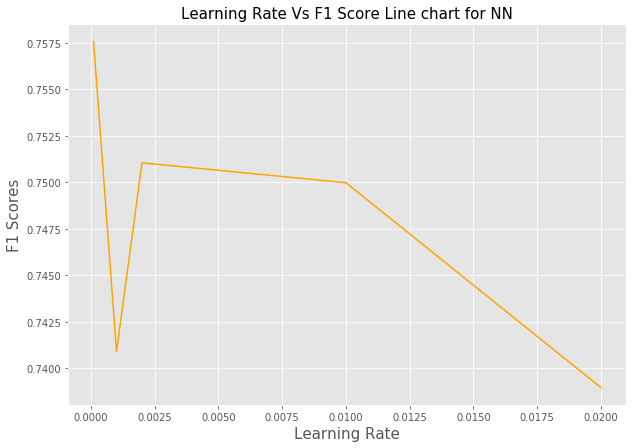

In [128]:
plt.figure(figsize=(10,7))
plt.plot(lr1,res, color='orange')
plt.title('Learning Rate Vs F1 Score Line chart for NN', fontsize=15)
plt.xlabel('Learning Rate', fontsize=15)
plt.ylabel('F1 Scores', fontsize=15)
plt.show()

#### Reference:
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

#### Performance Enhancment

In [129]:
from sklearn.model_selection import GridSearchCV
def parametertuning(name,model,param_grid):    
    grid_clf_acc = GridSearchCV(estimator=model, param_grid = param_grid, n_jobs=-1,scoring = 'f1_macro')
    grid_clf_acc.fit(X_train, y_train)
    grid_clf_acc.best_score_
    print(name)
    print("Best score")
    print(grid_clf_acc.best_score_)
    print("Best parameters")
    print(grid_clf_acc.best_params_ )

In [130]:
param_grid = {
'activation': ['relu', 'logistic'],
'solver': ["lbfgs", "sgd"],
'learning_rate_init': [0.001, 0.005],
'early_stopping': [False, True]
}
parametertuning("Neural Network :", mlp, param_grid)

c:\users\aakash patel\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Neural Network :
Best score
0.7560633509453901
Best parameters
{'activation': 'logistic', 'early_stopping': True, 'learning_rate_init': 0.001, 'solver': 'lbfgs'}


Parameter Tuned Neural Network :
Testing accuracy : 0.8339965889710063
Training accuracy : 0.8392865844744408
Testing f1 : 0.7624384445702161
Training f1 : 0.7731712534085516


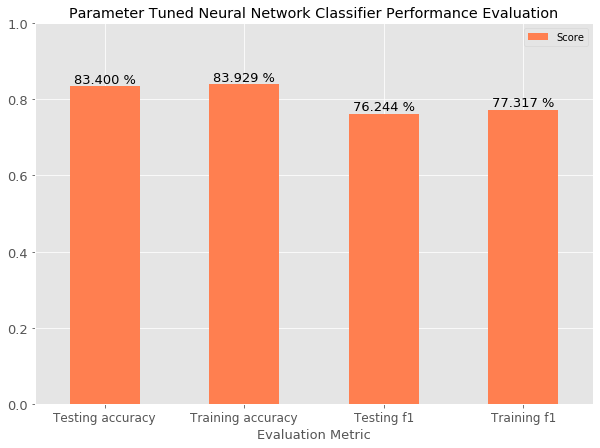

In [169]:
mlp_best = MLPClassifier(activation='logistic',early_stopping=True,learning_rate_init=0.001,solver='lbfgs')
evaluateModelsOnSplittedData('Parameter Tuned Neural Network',mlp_best)

With Parameter tuning we can have best F1-Score to be **76.244**. It's better compared to classifying dataset with default parameters of the MLP Classifier. It can be further increased with lowering learning rate. But it would be too computationally expensive to run on local machine.

#### Predicting Results

In [155]:
path = os.getcwd()
path = path+ '\\' + 'dataset1_test.csv'
df_test = pd.read_csv(path)

In [156]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,17,Private,269430,10th,6,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States
1,17,Private,40299,11th,7,Never-married,Sales,Own-child,White,Female,0,0,25,United-States
2,17,Private,190941,10th,6,Never-married,Sales,Own-child,White,Female,0,0,20,United-States
3,17,Private,61838,11th,7,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States
4,17,Private,28544,11th,7,Never-married,Sales,Not-in-family,White,Female,0,0,20,United-States


In [157]:
# Renaming attributes
df_test=df_test.rename(columns={'capital-loss': 'capital_loss', 'capital-gain': 'capital_gain', 'hours-per-week':'hrs_per_week' ,'education-num':'education_num' , 'marital-status':'marital_status', 'native-country':'native_country'})

In [158]:
# Normalize age
df_test.age = num_normalizer(df_test.age)
# Normalize fnlwgt
df_test.fnlwgt = num_normalizer(df_test.fnlwgt)
# Normalize capital gain
df_test.capital_gain = num_normalizer(df_test.capital_gain)
# Normalize capital loss
df_test.capital_loss = num_normalizer(df_test.capital_loss)
# Normalize hours-per-week
df_test.hrs_per_week = num_normalizer(df_test.hrs_per_week)
# Normalize education_num
df_test.education_num = num_normalizer(df_test.education_num)

In [159]:
df_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country
0,0.000000,Private,0.173293,10th,0.333333,Never-married,Machine-op-inspct,Not-in-family,White,Male,0.000000,0.000000,0.397959,United-States
1,0.000000,Private,0.018151,11th,0.400000,Never-married,Sales,Own-child,White,Female,0.000000,0.000000,0.244898,United-States
2,0.000000,Private,0.120149,10th,0.333333,Never-married,Sales,Own-child,White,Female,0.000000,0.000000,0.193878,United-States
3,0.000000,Private,0.032735,11th,0.400000,Never-married,Farming-fishing,Own-child,White,Male,0.000000,0.000000,0.397959,United-States
4,0.000000,Private,0.010192,11th,0.400000,Never-married,Sales,Not-in-family,White,Female,0.000000,0.000000,0.193878,United-States
5,0.000000,Private,0.045716,11th,0.400000,Never-married,Sales,Own-child,White,Female,0.000000,0.000000,0.193878,United-States
6,0.000000,Private,0.201362,7th-8th,0.200000,Never-married,Other-service,Own-child,White,Male,0.000000,0.000000,0.357143,Mexico
7,0.000000,Private,0.078477,11th,0.400000,Never-married,Sales,Other-relative,White,Female,0.000000,0.000000,0.255102,United-States
8,0.000000,Private,0.175285,11th,0.400000,Never-married,Adm-clerical,Own-child,White,Female,0.000000,0.000000,0.061224,United-States
9,0.000000,Private,0.108502,10th,0.333333,Never-married,Sales,Not-in-family,White,Female,0.000000,0.000000,0.142857,United-States


In [160]:
def onehotencodertest(attr, colname):
    ex= pd.get_dummies(attr,prefix=colname, drop_first=True)
    global df_test
    df_test = pd.concat( [df_test,ex] , axis=1)
    df_test.drop([colname], axis=1, inplace=True)

In [161]:
# Encoding workclass
onehotencodertest(df_test.workclass, 'workclass')
# Encoding education
onehotencodertest(df_test.education,'education')
# Encoding marital_status
onehotencodertest(df_test.marital_status,'marital_status')
# Encoding occupation
onehotencodertest(df_test.occupation,'occupation')
# Encoding relationship
onehotencodertest(df_test.relationship,'relationship')
# Encoding race
onehotencodertest(df_test.race,'race')
# Encoding sex
onehotencodertest(df_test.sex,'sex')
# Encoding native_country
onehotencodertest(df_test.native_country,'native_country')

In [162]:
len(df_test.columns.values)

95

In [163]:
len(X_test.columns.values)

96

In [164]:
len(df_test.columns.values)

95

In [165]:
def diff(first, second):
        second = set(second)
        return [item for item in first if item not in second]

In [166]:
difflist = diff(X_test, df_test)
X_test[X_test['native_country_Holand-Netherlands']!=0]

,age,fnlwgt,education_num,capital_gain,capital_loss,hrs_per_week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
17678,0.205479,0.008847,0.152542,0.0,0.506198,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**NOTE:**
We don't have any record with native country as Holand-Netherlands in provided dataset1_test.csv. Thus adding a column to dataframe to have same number of attributes

In [167]:
df_test['native_country_Holand-Netherlands']=0
len(df_test.columns.values)

96

In [170]:
y_test_pred = mlp_best.predict(df_test)

In [174]:
final_results = []
for rec in y_test_pred:
    if rec!=0:
        final_results.append(">50K")
    else:
        final_results.append("<=50K")

In [183]:
len(final_results)

15060

In [182]:
import csv
with open('B00807065_prediction.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for item in final_results:
        wr.writerow([item])